# CIC-MalMem-2022 Answer File

### Author: Ruba Al Omari (change this to your name in your submission)

**CIC-MalMem-2022 Original Dataset Source:  University of New Brunswick | UNB - Canadian Institute for Cybersecurity . https://www.unb.ca/cic/datasets/malmem-2022.html**


**CIC-MalMem-2022 Modified Dataset: https://raw.githubusercontent.com/rubaomari/mal/refs/heads/main/CIC-MalMem-2022-Modified-RA.csv**

In [ ]:
#import libraries
#you can install missing libraries using pip install, example: pip install numpy

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Tip: If you get future warnings you can ignore them using:

import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# Task 1-Exploratory Data Analysis

<span style="color: yellow;">15 Marks, 3 marks per step from step1 to step5</span>


Load the dataset using Pandas into a DataFrame, which is the object Pandas uses to store tables of data.
Pandas uses two objects for storing datasets: the DataFrame and the Series.
Series is used for datasets with only one column, and DataFrame is used for datasets of more than one column.

### 1. Load the dataset

In [ ]:
#load the dataset
url = "https://raw.githubusercontent.com/rubaomari/mal/refs/heads/main/CIC-MalMem-2022-Modified-RA.csv"
malware_df = pd.read_csv(url, sep=',')

#let's create a backup copy of the dataset
malware_df_backup = malware_df.copy()

### 2. Take a quick look at the data structure


#### Use head() to look at the first 5 rows, you can also choose to look at more than the first 5 rows using head(10).


In [ ]:
malware_df.head(10)

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,221,26,24,116,0,121,87,0,8,Benign
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,222,26,24,118,0,122,87,0,8,Benign
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,222,26,27,118,0,120,88,0,8,Benign
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,222,26,27,118,0,120,88,0,8,Benign
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,222,26,24,118,0,124,87,0,8,Benign
5,Benign,40,12,13.800000,0,306.950000,2082,52.050000,12278,306.950000,...,222,26,27,118,0,123,88,0,8,Benign
6,NaN,43,13,NaN,0,305.023256,2169,50.441860,13116,305.023256,...,222,26,27,118,0,123,88,0,8,Benign
7,NaN,42,16,NaN,0,281.404762,2067,49.214286,11819,281.404762,...,222,26,24,118,0,124,87,0,8,Benign
8,Benign,42,16,NaN,0,281.261905,2067,49.214286,11813,281.261905,...,222,26,24,118,0,124,87,0,8,Benign
9,Benign,40,12,NaN,0,308.000000,2082,52.050000,12320,308.000000,...,222,26,27,118,0,123,88,0,8,Benign


#### Use describe() method to see a summary of the numerical attributes.

In [ ]:
malware_df.describe()

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric
count,58596.000000,58596.000000,58589.000000,58596.0,58596.000000,58596.000000,58596.000000,5.859600e+04,58596.000000,58596.0,...,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,58596.000000
mean,41.394771,14.713837,11.341492,0.0,247.509819,1810.805447,43.707806,1.025858e+04,249.560958,0.0,...,391.347549,221.406581,25.996245,25.063417,116.879514,0.0,121.995546,86.905659,0.000853,7.999881
std,5.777249,2.656748,1.588203,0.0,111.857790,329.782639,5.742023,4.866864e+03,145.999866,0.0,...,4.529704,1.991087,0.170790,1.529628,1.550401,0.0,2.822858,3.134117,0.029199,0.010929
min,21.000000,8.000000,1.650000,0.0,34.962500,670.000000,7.333333,3.514000e+03,71.139241,0.0,...,94.000000,55.000000,6.000000,7.000000,26.000000,0.0,30.000000,50.000000,0.000000,7.000000
25%,40.000000,12.000000,9.972973,0.0,208.725000,1556.000000,38.833333,8.393000e+03,209.648228,0.0,...,389.000000,221.000000,26.000000,24.000000,116.000000,0.0,121.000000,87.000000,0.000000,8.000000
50%,41.000000,15.000000,11.000000,0.0,243.963710,1735.000000,42.781524,9.287500e+03,247.208951,0.0,...,389.000000,221.000000,26.000000,24.000000,116.000000,0.0,122.000000,87.000000,0.000000,8.000000
75%,43.000000,16.000000,12.861858,0.0,289.974322,2087.000000,49.605280,1.219300e+04,291.355050,0.0,...,395.000000,222.000000,26.000000,27.000000,118.000000,0.0,123.000000,88.000000,0.000000,8.000000
max,240.000000,72.000000,16.818182,0.0,24845.951220,3443.000000,53.170732,1.047310e+06,33784.193550,0.0,...,395.000000,222.000000,26.000000,27.000000,118.000000,0.0,129.000000,89.000000,1.000000,8.000000


#### Use info() to get a quick description of the data, the total number of rows, each attribute’s type, and the number of non-null values.

The original dataset from UNB doesn't have any missing values. I have randomly removed values so we can discuss what to do with missing data.

In [ ]:
malware_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58596 entries, 0 to 58595
Data columns (total 57 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Category                                58594 non-null  object 
 1   pslist.nproc                            58596 non-null  int64  
 2   pslist.nppid                            58596 non-null  int64  
 3   pslist.avg_threads                      58589 non-null  float64
 4   pslist.nprocs64bit                      58596 non-null  int64  
 5   pslist.avg_handlers                     58596 non-null  float64
 6   dlllist.ndlls                           58596 non-null  int64  
 7   dlllist.avg_dlls_per_proc               58596 non-null  float64
 8   handles.nhandles                        58596 non-null  int64  
 9   handles.avg_handles_per_proc            58596 non-null  float64
 10  handles.nport                           58596 non-null  in

#### Use value_counts to show what categories exist and how many rows belong to each Category and to each Class

In [ ]:
malware_df['Category'].value_counts()

,count
Category,
Benign,29296
Spyware-Gator-1c227a11e3d4987630bf89b1712442a4d3e5cb551d13273811ec47c237a8b303-7.raw,2
Spyware-Gator-1bd318a4df278d1bd30e910b858aec9a1db674474b0e6d2d803648a43aa8023d-6.raw,2
Spyware-Gator-1bd318a4df278d1bd30e910b858aec9a1db674474b0e6d2d803648a43aa8023d-7.raw,2
Spyware-Gator-1bd318a4df278d1bd30e910b858aec9a1db674474b0e6d2d803648a43aa8023d-8.raw,2
...,...
Ransomware-Ako-00a2c6bab1e53f679cdd4fdc772cd291928c109b9b747652639a1700d844f719-3.raw,1
Ransomware-Ako-00a2c6bab1e53f679cdd4fdc772cd291928c109b9b747652639a1700d844f719-2.raw,1
Ransomware-Ako-00a2c6bab1e53f679cdd4fdc772cd291928c109b9b747652639a1700d844f719-10.raw,1


In [ ]:
malware_df['Class'].value_counts()

,count
Class,
Benign,29298
Malware,29298


### 3. Plot a pie of the data classes

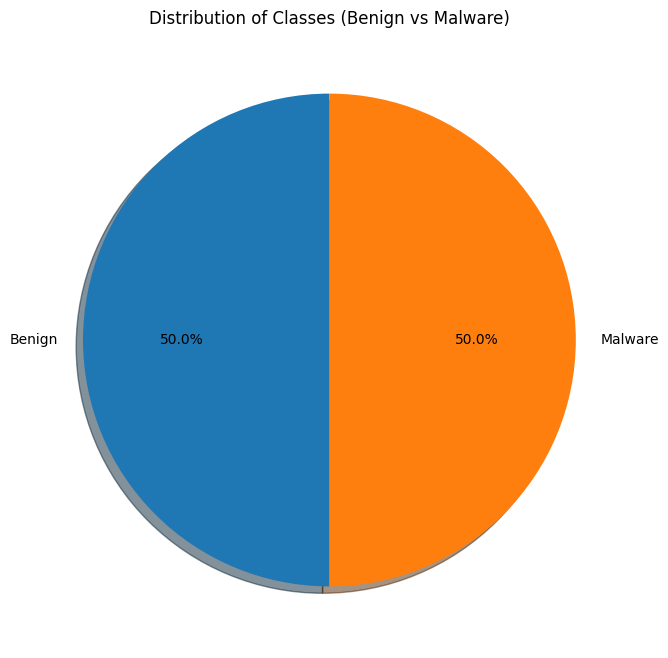

In [ ]:
plt.figure(figsize=(8, 8))
malware_df['Class'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Distribution of Classes (Benign vs Malware)')
plt.ylabel('')
plt.show()

### 4. Plot a a histogram of the features

<Figure size 1500x1000 with 0 Axes>

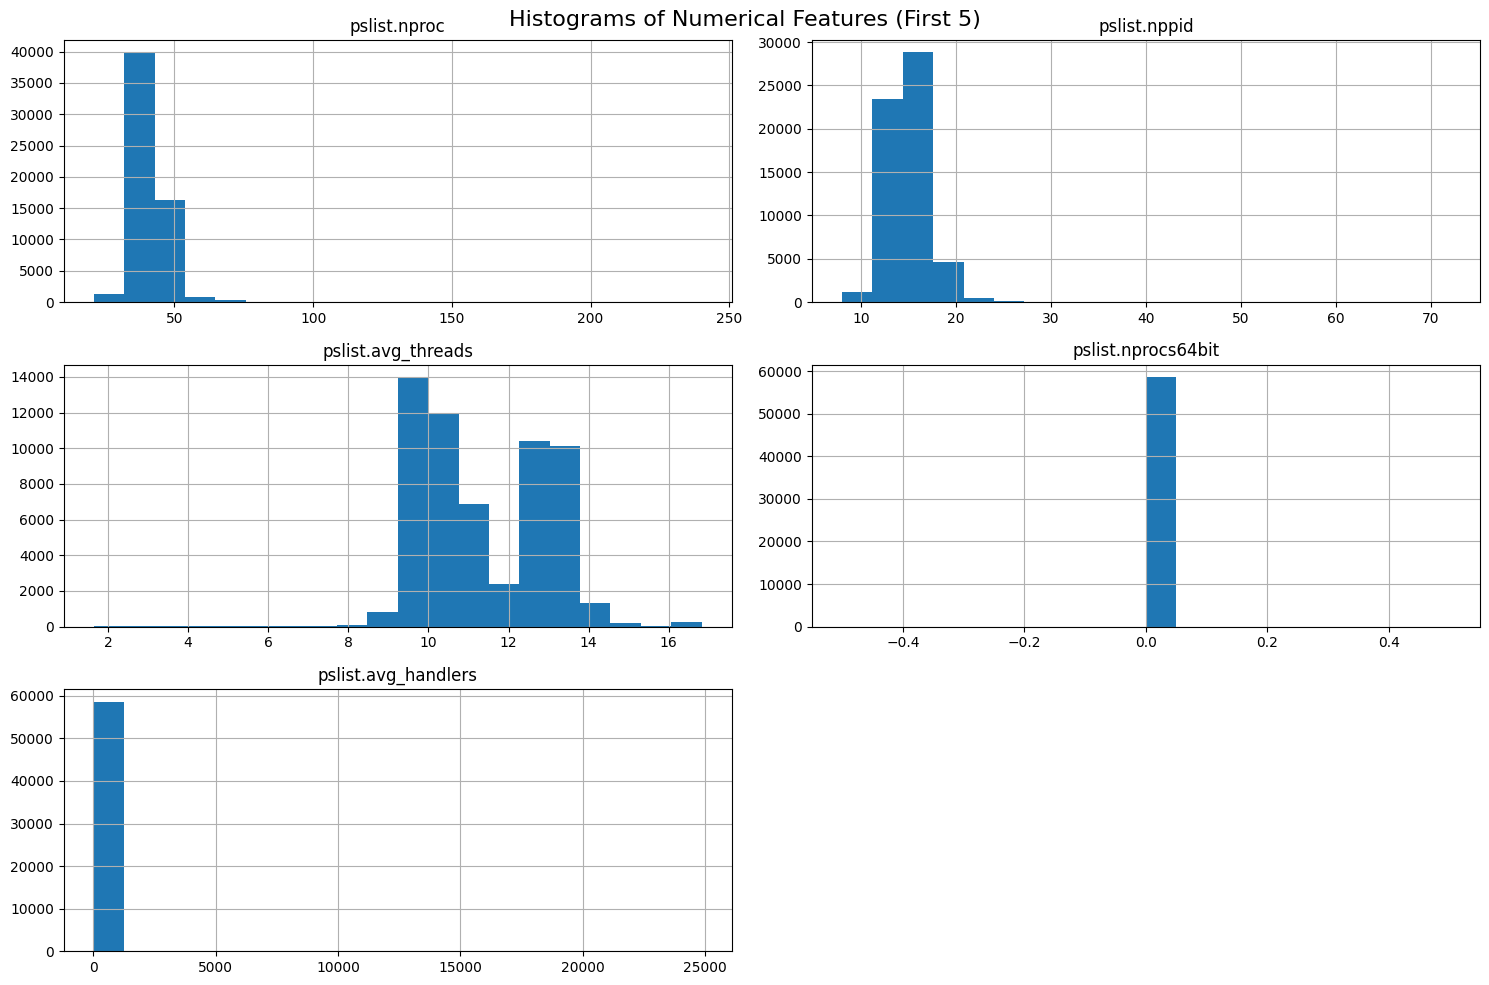

In [ ]:
numerical_features = malware_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
plt.figure(figsize=(15, 10))
malware_df[numerical_features[:5]].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features (First 5)', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

### 5. Look for correlations using Pearson correlation coefficient.

In [ ]:
correlation_matrix = malware_df.select_dtypes(include=['float64', 'int64']).corr()
correlations = correlation_matrix.unstack()
correlations = correlations.sort_values(key=abs, ascending=False)
correlations = correlations[correlations < 1]

# Task 2-Prepare the Data for ML Algorithms

<span style="color: yellow;">24 Marks, 3 marks per step from step6 to step13</span>

### 6. Extract malware category and malware family from the unique identifiers.


In [ ]:
def extract_category_family(category_str):
    """
    Extracts malware category and family from the category string.
    Example: "Trojan-Emotet-00e4236fd9c5f8ec7949ed00cc0385c93f7cd45017c526082ef38f870b22f17e-10.raw"
    Should return: "Trojan", "Emotet"
    """
    # Check for NaN or empty strings
    if not isinstance(category_str, str) or category_str.strip() == "" or category_str.lower() == "nan":
        return np.nan, np.nan  # Return NaN values instead of "Unknown"

    # Check if it's a benign sample
    if category_str.lower().startswith('benign'):
        return "Benign", "Benign"

    # For malware samples, extract category and family
    parts = category_str.split('-')

    if len(parts) < 2:
        print(f"Unexpected format: {category_str}")  # Debug print
        return np.nan, np.nan  # Return NaN if the format is unexpected

    # First part is category (e.g., Trojan, Ransomware)
    category = parts[0].capitalize()

    # Second part is family (e.g., Emotet, Zeus)
    family = parts[1].capitalize()

    return category, family

# Apply the function to create new columns
malware_df[['MalwareCategory', 'MalwareFamily']] = malware_df['Category'].apply(
    lambda x: pd.Series(extract_category_family(x))
)

In [ ]:
#run the code below to see your extraction succeeded, the name of your dataframe might be different.
print(malware_df.columns)
malware_df.head()

Index(['Category', 'pslist.nproc', 'pslist.nppid', 'pslist.avg_threads',
       'pslist.nprocs64bit', 'pslist.avg_handlers', 'dlllist.ndlls',
       'dlllist.avg_dlls_per_proc', 'handles.nhandles',
       'handles.avg_handles_per_proc', 'handles.nport', 'handles.nfile',
       'handles.nevent', 'handles.ndesktop', 'handles.nkey', 'handles.nthread',
       'handles.ndirectory', 'handles.nsemaphore', 'handles.ntimer',
       'handles.nsection', 'handles.nmutant', 'ldrmodules.not_in_load',
       'ldrmodules.not_in_init', 'ldrmodules.not_in_mem',
       'ldrmodules.not_in_load_avg', 'ldrmodules.not_in_init_avg',
       'ldrmodules.not_in_mem_avg', 'malfind.ninjections',
       'malfind.commitCharge', 'malfind.protection',
       'malfind.uniqueInjections', 'psxview.not_in_pslist',
       'psxview.not_in_eprocess_pool', 'psxview.not_in_ethread_pool',
       'psxview.not_in_pspcid_list', 'psxview.not_in_csrss_handles',
       'psxview.not_in_session', 'psxview.not_in_deskthrd',
       'psxv

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class,MalwareCategory,MalwareFamily
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,24,116,0,121,87,0,8,Benign,Benign,Benign
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,24,118,0,122,87,0,8,Benign,Benign,Benign
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,27,118,0,120,88,0,8,Benign,Benign,Benign
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,27,118,0,120,88,0,8,Benign,Benign,Benign
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,24,118,0,124,87,0,8,Benign,Benign,Benign


### 7. Check for duplicate rows, and remove them if any.

In [ ]:
duplicate_count = malware_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 534


In [ ]:
if duplicate_count > 0:
    malware_df = malware_df.drop_duplicates()
    print(f"Duplicates removed. New shape: {malware_df.shape}")

Duplicates removed. New shape: (58062, 59)


### 8. Handle the missing values
we will handle the missing values in the preprocessing pipeline, but for now let's have a look to see if we have missing values.

In [ ]:
missing_values = malware_df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

Missing values per column:
Category                      2
pslist.avg_threads            7
handles.ndesktop              8
handles.nmutant               5
ldrmodules.not_in_init        4
ldrmodules.not_in_load_avg    9
ldrmodules.not_in_mem_avg     3
malfind.protection            3
MalwareCategory               2
MalwareFamily                 2
dtype: int64


For the missing values, we will fill the mean if it is a numerical column and the most frequent if it is a categorical column.

We will do this through creating a pipeline, that will also scale the features and perform encoding in the next step.




### 9. Drop Category, pslist.nprocs64bit, handles.nport, and svcscan.interactive_process_services features

**Note** You can also drop columns with a specific percent of missing values, for example the below command will drop columns that has 70% (or more) missing values

    - dataset.dropna(axis='columns', thresh=int(0.7* df.shape[0]))

In [ ]:
columns_to_drop = ['Category', 'pslist.nprocs64bit', 'handles.nport', 'svcscan.interactive_process_services']
malware_df = malware_df.drop(columns=columns_to_drop, axis=1)
print(f"Columns dropped. New shape: {malware_df.shape}")

Columns dropped. New shape: (58062, 55)


### 10. Create and apply a preprocessing pipeline:

1. Fill in the missing numerical values with the mean using a SimpleImputer

2. Scale the numerical columns using StandardScaler.

3. Fill in the missing categorical values with the most_frequent value using SimpleImputer

In [ ]:

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Identify numerical and categorical columns (excluding target and extracted columns)
numerical_cols = malware_df.select_dtypes(include='number').columns.tolist()
categorical_cols = malware_df.select_dtypes(exclude='number').columns.tolist()

# Create preprocessing pipelines for numerical and categorical data
numerical_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())

categorical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'))
# Combine preprocessing steps
preprocessor = ColumnTransformer([
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ],
    remainder='passthrough'
)

In [ ]:
malware_df_prepared = preprocessor.fit_transform(malware_df)
feature_names =preprocessor.get_feature_names_out()
malware_df_prepared = pd.DataFrame(malware_df_prepared, columns=feature_names)
malware_df_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58062 entries, 0 to 58061
Data columns (total 55 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   num__pslist.nproc                            58062 non-null  object
 1   num__pslist.nppid                            58062 non-null  object
 2   num__pslist.avg_threads                      58062 non-null  object
 3   num__pslist.avg_handlers                     58062 non-null  object
 4   num__dlllist.ndlls                           58062 non-null  object
 5   num__dlllist.avg_dlls_per_proc               58062 non-null  object
 6   num__handles.nhandles                        58062 non-null  object
 7   num__handles.avg_handles_per_proc            58062 non-null  object
 8   num__handles.nfile                           58062 non-null  object
 9   num__handles.nevent                          58062 non-null  object
 10  num__handl

### 11. Display your pipeline

In [ ]:
from sklearn import set_config
set_config(display='diagram')
print("Preprocessing pipeline:")
preprocessor

Preprocessing pipeline:


ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['pslist.nproc', 'pslist.nppid',
                                  'pslist.avg_threads', 'pslist.avg_handlers',
                                  'dlllist.ndlls', 'dlllist.avg_dlls_per_proc',
                                  'handles.nhandles',
                                  'handles.avg_handles_per_proc',
                                  'handles.nfile', 'handles.nevent...
                                  'ldrmodules.not_in_load_avg',
                                  'ldrmodules.not_in_init_avg',
                                  'ldrmodules.not_in_mem_avg',
                                  'malfind.ninjections', 'malfind.commitCharge',
                                  'malfind.protection',
                                  'malfind.uniqueInjections',
                                  'psxview.not_in_pslist',
                                  'psxview.not_in_eprocess_pool', ...]),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Class', 'MalwareCategory',
                                  'MalwareFamily'])])

### 12. Print your dataframe .shape()

In [ ]:
print("Prepared DataFrame shape:", malware_df_prepared.shape)

Prepared DataFrame shape: (58062, 55)


### 13. Make a backup copy of your dataframe

In [ ]:
malware_df_prepared_backup = malware_df_prepared.copy()

# Task 3-Select a Model and Train it to Predict Class
<span style="color: yellow;">12 Marks, 3 marks per step from step14 to step17</span>

<span style="color: yellow;">5 Marks for step18</span>

### 14. Drop the MalwareFamily and MalwareCategory features, and use Class as your target.

In [ ]:
malware_df_prepared.columns = [col.split('__', 1)[-1] for col in malware_df_prepared.columns]
X = malware_df_prepared.drop(['MalwareFamily', 'MalwareCategory', 'Class'], axis=1)
y = malware_df_prepared['Class']

### 15. Split the dataset into a training dataset (80%) and testing dataset.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"{X_train.shape} {y_train.shape} {X_test.shape} {y_test.shape}")

(46449, 52) (46449,) (11613, 52) (11613,)


### 16. Train a svm classifier (svc) to predict the class of the file, whether it is Benign or Malware on the training set using: kernel = rbf, gamma = 1, and C =1.

In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='rbf', gamma=1, C=1, random_state=42)
svm_classifier.fit(X_train, y_train)

SVC(C=1, gamma=1, random_state=42)

### 17. Test your model on the X_Test, and report the classification_report on the y_test and y_predict.

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate and print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9989
Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      5804
     Malware       1.00      1.00      1.00      5809

    accuracy                           1.00     11613
   macro avg       1.00      1.00      1.00     11613
weighted avg       1.00      1.00      1.00     11613



### 18. Plot the confusion matrix of your test results using ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

<Figure size 1000x800 with 0 Axes>

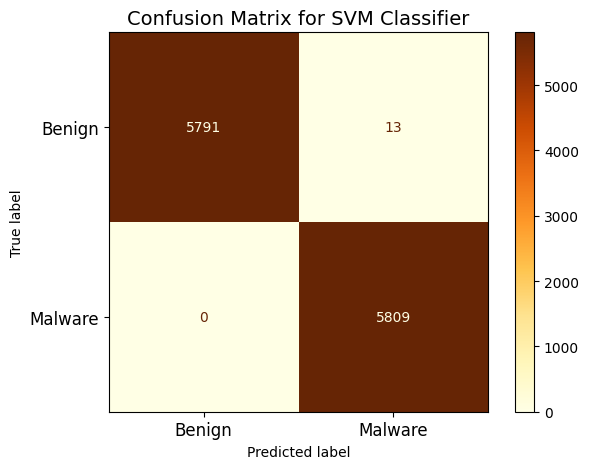

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='YlOrBr')
plt.title('Confusion Matrix for SVM Classifier', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Task 4-Hyperparameters Fine Tuning

<span style="color: yellow;">9 Marks, 3 marks per step from step19 to step21</span>


### 19. Use GridSearchCV to find the best value of C: [0.1, 1, 10], and print out the grid_search.best_params_

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10]
}

# Create GridSearchCV
grid_search = GridSearchCV(
    SVC(kernel='rbf', gamma=1, random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best parameters:", grid_search.best_params_)
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

Best parameters: {'C': 10}
Best cross-validation score: 0.9986


### 20. Train 2 other classifiers of your choice, one of which is a neural network.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# 1. Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_report = classification_report(y_test, rf_pred, output_dict=True)

# 2. Neural Network (MLP Classifier)
nn_classifier = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    max_iter=300,
    activation='relu',
    solver='adam',
    random_state=42
)
nn_classifier.fit(X_train, y_train)
nn_pred = nn_classifier.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_pred)
nn_report = classification_report(y_test, nn_pred, output_dict=True)

# Get SVM results from the best model
best_svm = grid_search.best_estimator_
svm_pred = best_svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred, output_dict=True)

### 21. Compare the results of the three classifiers in a table. Include Accuracy, F1-Score, Precision and Recall.

The table below is showing the first row only, your table should should show three rows, one for each classifier

In [ ]:
import pandas as pd

# Create comparison table
comparison_table = pd.DataFrame({
    'Classifier': ['SVM (Best C)', 'Random Forest', 'Neural Network'],
    'Accuracy': [svm_accuracy, rf_accuracy, nn_accuracy],
    'Precision': [svm_report['weighted avg']['precision'],
                 rf_report['weighted avg']['precision'],
                 nn_report['weighted avg']['precision']],
    'Recall': [svm_report['weighted avg']['recall'],
              rf_report['weighted avg']['recall'],
              nn_report['weighted avg']['recall']],
    'F1-Score': [svm_report['weighted avg']['f1-score'],
                rf_report['weighted avg']['f1-score'],
                nn_report['weighted avg']['f1-score']]
})

# Format numeric columns to 4 decimal places
for col in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
    comparison_table[col] = comparison_table[col].map('{:.4f}'.format)

# Print the comparison table
print("Model Comparison:")
print(comparison_table)

# Display as a markdown table
from IPython.display import display, Markdown
display(Markdown(comparison_table.to_markdown(index=False)))

Model Comparison:
       Classifier Accuracy Precision  Recall F1-Score
0    SVM (Best C)   0.9992    0.9992  0.9992   0.9992
1   Random Forest   0.9998    0.9998  0.9998   0.9998
2  Neural Network   1.0000    1.0000  1.0000   1.0000


| Classifier     |   Accuracy |   Precision |   Recall |   F1-Score |
|:---------------|-----------:|------------:|---------:|-----------:|
| SVM (Best C)   |     0.9992 |      0.9992 |   0.9992 |     0.9992 |
| Random Forest  |     0.9998 |      0.9998 |   0.9998 |     0.9998 |
| Neural Network |     1      |      1      |   1      |     1      |

| Classifier | Precision | Recall | Accuracy | F1-Score |
|------------|-----------|--------|----------|----------|
|   Value 1  |  Value 2  | Value 3| Value 4  | Value 5  |


# Task 5-Predict Malware Category

<span style="color: yellow;">10 Marks for step 23</span>

### 22.	Revert back to the malware_df_prepared_backup dataset you saved in step 13.

In [ ]:
malware_df_prepared = malware_df_prepared_backup.copy()

### 23.	Repeat Task 3, but this time drop Class and MalwareFamily, and use MalwareCategory as your target.
Do it all (steps 14 to 18) in a single code cell below

X_train shape: (46449, 52), y_train shape: (46449,)
X_test shape: (11613, 52), y_test shape: (11613,)
Accuracy: 0.7997
Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      5804
  Ransomware       0.59      0.55      0.57      1932
     Spyware       0.63      0.63      0.63      1982
      Trojan       0.57      0.62      0.60      1895

    accuracy                           0.80     11613
   macro avg       0.70      0.70      0.70     11613
weighted avg       0.80      0.80      0.80     11613



<Figure size 1000x800 with 0 Axes>

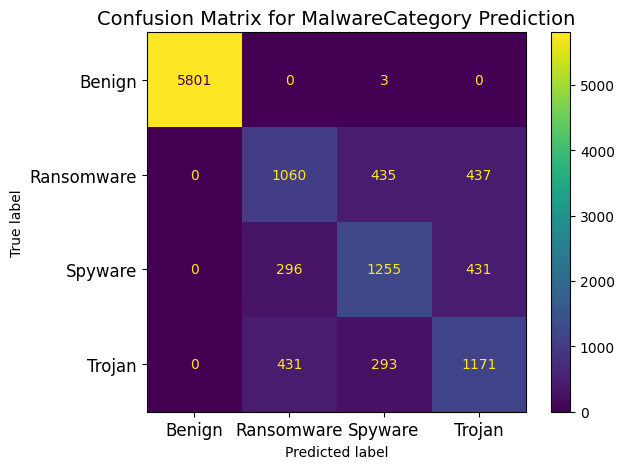

In [ ]:
malware_df_prepared.columns = [col.split('__', 1)[-1] for col in malware_df_prepared.columns]
X_category = malware_df_prepared.drop(['Class', 'MalwareFamily', 'MalwareCategory'], axis=1)
y_category = malware_df_prepared['MalwareCategory']

# Split data into training and testing sets (80% train, 20% test)
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(
    X_category, y_category, test_size=0.2, random_state=42
)

# Print shapes
print(f"X_train shape: {X_train_cat.shape}, y_train shape: {y_train_cat.shape}")
print(f"X_test shape: {X_test_cat.shape}, y_test shape: {y_test_cat.shape}")

# Train SVM classifier for MalwareCategory prediction
svm_cat = SVC(kernel='rbf', gamma=1, C=1, random_state=42)
svm_cat.fit(X_train_cat, y_train_cat)

# Make predictions
y_pred_cat = svm_cat.predict(X_test_cat)

# Calculate accuracy
accuracy_cat = accuracy_score(y_test_cat, y_pred_cat)
print(f"Accuracy: {accuracy_cat:.4f}")

# Generate and print classification report
print("Classification Report:")
print(classification_report(y_test_cat, y_pred_cat))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay.from_predictions(y_test_cat, y_pred_cat)
plt.title('Confusion Matrix for MalwareCategory Prediction', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Task 6-Predict Malware Family

<span style="color: yellow;">10 Marks for step 25</span>

### 24.	Revert back to the malware_df_prepared_backup dataset you saved in step 13.

In [ ]:
malware_df_prepared = malware_df_prepared_backup.copy()

### 25.	Repeat Task 3, but this time drop Class and MalwareCategory, and use MalwareFamily as your target.
Do it all (steps 14 to 18) in a single code cell below

X_train shape: (46449, 52), y_train shape: (46449,)
X_test shape: (11613, 52), y_test shape: (11613,)
Accuracy: 0.6591
Classification Report:
              precision    recall  f1-score   support

180solutions       0.28      0.20      0.23       436
         Ako       0.23      0.17      0.20       431
      Benign       0.96      1.00      0.98      5804
       Conti       0.29      0.24      0.26       406
         Cws       0.22      0.14      0.17       378
      Emotet       0.30      0.33      0.32       380
       Gator       0.48      0.49      0.49       400
        Maze       0.42      0.27      0.33       350
        Pysa       0.26      0.10      0.14       293
     Reconyc       0.39      0.31      0.34       302
     Refroso       0.39      0.55      0.46       426
        Scar       0.29      0.35      0.32       379
       Shade       0.33      0.32      0.33       452
        Tibs       0.79      0.49      0.60       286
 Transponder       0.24      0.34      0.28    

<Figure size 1200x1000 with 0 Axes>

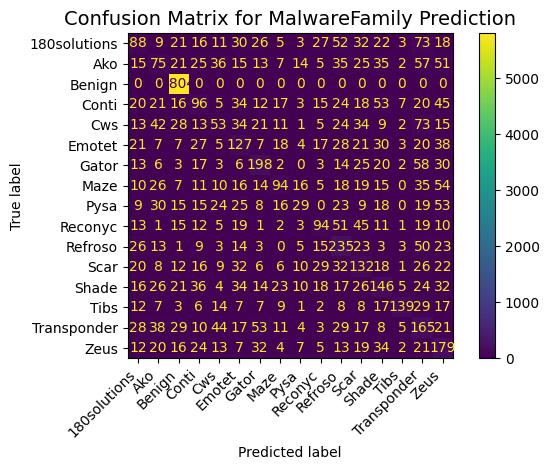

In [ ]:
malware_df_prepared.columns = [col.split('__', 1)[-1] for col in malware_df_prepared.columns]
X_family = malware_df_prepared.drop(['Class', 'MalwareCategory', 'MalwareFamily'], axis=1)
y_family = malware_df_prepared['MalwareFamily']

X_train_fam, X_test_fam, y_train_fam, y_test_fam = train_test_split(
    X_family, y_family, test_size=0.2, random_state=42
)

# Print shapes
print(f"X_train shape: {X_train_fam.shape}, y_train shape: {y_train_fam.shape}")
print(f"X_test shape: {X_test_fam.shape}, y_test shape: {y_test_fam.shape}")

# Train SVM classifier for MalwareFamily prediction
svm_fam = SVC(kernel='rbf', gamma=1, C=1, random_state=42)
svm_fam.fit(X_train_fam, y_train_fam)

# Make predictions
y_pred_fam = svm_fam.predict(X_test_fam)

# Calculate accuracy
accuracy_fam = accuracy_score(y_test_fam, y_pred_fam)
print(f"Accuracy: {accuracy_fam:.4f}")

# Generate and print classification report
print("Classification Report:")
print(classification_report(y_test_fam, y_pred_fam))

# Plot confusion matrix
plt.figure(figsize=(12, 10))
ConfusionMatrixDisplay.from_predictions(y_test_fam, y_pred_fam)
plt.title('Confusion Matrix for MalwareFamily Prediction', fontsize=14)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

### 26.	Why do you think the accuracy is this low in this task?
<span style="color: yellow;">5 Marks for step 26</span>

The accuracy for the MalwareFamily prediction task is significantly lower than for the Class (Benign vs. Malware)
and MalwareCategory predictions for several reasons:

1. Higher Complexity Classification: Instead of binary (Class) or 4-class (Category) classification,
   MalwareFamily involves distinguishing between 15+ different families, making it a more complex task.

2. Feature Limitations: The current memory forensics features might be good at distinguishing malware from benign
   samples, but may lack the specificity needed to differentiate between similar malware families that share
   behavioral traits.

3. Class Imbalance: Some malware families have fewer samples than others, creating an imbalanced dataset that
   makes it difficult for the model to learn patterns for underrepresented families.

4. Behavioral Similarities: Different malware families within the same category may exhibit similar memory
   patterns, making them hard to distinguish using memory forensics features alone.

5. Feature Engineering Needs: The current feature set may not capture the nuanced differences between malware
   families, suggesting the need for more specialized features specifically designed to identify family-level
   characteristics.

Potential improvements:
- Feature engineering to create more family-specific indicators
- Use ensemble methods that combine multiple classifiers
- Apply hierarchical classification: first classify by category, then by family within that category
- Address class imbalance through techniques like stratification
- More sophisticated algorithms or deep learning approaches that can capture complex patterns
- Incorporate additional data sources beyond memory forensics, such as static file features or network behavior

Code Quality and Style
- Code is clearly formatted and adheres to PEP 8 (or your chosen style guide).
- Variables and functions are named descriptively.
- The code includes clear comments explaining the purpose of code blocks and non-obvious logic.
- Code is structured into modular functions where appropriate.
- Unnecessary or redundant code is avoided.

<span style="color: yellow;">10 Marks for code quality and style</span>
